In [1]:
import gradio as gr

import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

import easyocr

import os
import io
import requests
import base64
import cv2

In [2]:
eader = easyocr.Reader(['en'])

In [3]:
def load_img_to_array(img_p):
    img = Image.open(img_p)
    img = img.convert("RGB")
    return np.array(img)

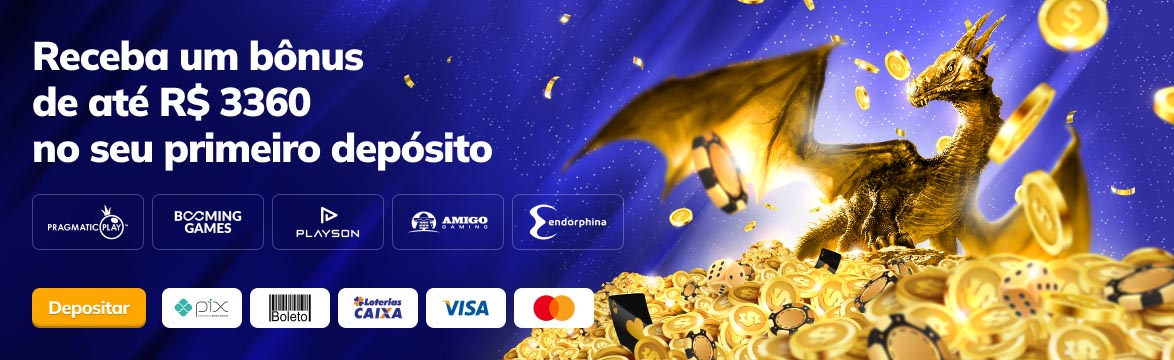

In [4]:
img = load_img_to_array("/home/jjjj/Documents/gallery_view/data_test/Desktop_Med/01A_Brazil_x1_Med.jpg")
Image.fromarray(img)

In [16]:
new_img = Image.fromarray(img.copy())
result = eader.readtext(np.array(new_img))
new_ = []

res = []
for i in result:
    i = np.array(i[0])
    new_.append([(i[:, 0].min(), i[:, 1].min()), (i[:, 0].max(), i[:, 1].max())])
    res.append([
        (i[:, 0].min(), i[:, 1].min()),
        (i[:, 0].min(), i[:, 1].max()),
        (i[:, 0].max(), i[:, 1].max()),
        (i[:, 0].max(), i[:, 1].min())
    ])

bboxes = np.array(new_).tolist()

draw = ImageDraw.Draw(new_img)

for (x1, y1), (x2, y2) in bboxes:
    draw.rectangle([(x1, y1), (x2, y2)])

# new_img, img, bboxes, np.array(res), result

In [17]:
bboxes

[[[29, 33], [369, 77]],
 [[26, 78], [318, 126]],
 [[31, 133], [157, 171]],
 [[155, 119], [501, 179]],
 [[173, 209], [245, 225]],
 [[441, 215], [491, 231]],
 [[547, 217], [609, 229]],
 [[45, 221], [101, 235]],
 [[183, 221], [235, 237]],
 [[295, 227], [363, 241]],
 [[45, 297], [134, 321]],
 [[192, 296], [230, 320]],
 [[271, 309], [311, 325]],
 [[355, 305], [405, 321]],
 [[442, 296], [492, 320]],
 [[960, 274], [1016, 334]]]

In [7]:
# bboxes = np.array(res)
map_bboxes = [True for _ in result]
predict_ocr = result

In [18]:
b = []
for bb, i in zip(bboxes, map_bboxes):
    if i:
        b.append(bb)

In [19]:
img.shape

(360, 1174, 3)

In [20]:
bboxes

[[[29, 33], [369, 77]],
 [[26, 78], [318, 126]],
 [[31, 133], [157, 171]],
 [[155, 119], [501, 179]],
 [[173, 209], [245, 225]],
 [[441, 215], [491, 231]],
 [[547, 217], [609, 229]],
 [[45, 221], [101, 235]],
 [[183, 221], [235, 237]],
 [[295, 227], [363, 241]],
 [[45, 297], [134, 321]],
 [[192, 296], [230, 320]],
 [[271, 309], [311, 325]],
 [[355, 305], [405, 321]],
 [[442, 296], [492, 320]],
 [[960, 274], [1016, 334]]]

In [24]:
frame_around_size = 10
new_ = []

mask = Image.new("L", (img.shape[1], img.shape[0]))
draw = ImageDraw.Draw(mask)

for i in bboxes:   
    i = np.array(i)
    i[0, :] -= frame_around_size
    i[1, :] += frame_around_size
    
    draw.rectangle([tuple(x) for x in i.tolist()], fill="white")
    #     
    # new_.append(c)

In [29]:
np.array(mask).max()

255

In [30]:
np.array(mask).shape

(360, 1174)

In [25]:
i.tolist()

[[950, 264], [1026, 344]]

In [ ]:
  
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)]
  
# creating new Image object
img = Image.new("RGB", (w, h))
  
# create rectangle image
img1 = ImageDraw.Draw(img)  
img1.rectangle(shape, fill ="# ffff33", outline ="red")
img.show()


In [13]:
new_

[[[19, 23], [379, 23], [379, 87], [19, 87]],
 [[16, 68], [328, 68], [328, 136], [16, 136]],
 [[21, 123], [167, 123], [167, 181], [21, 181]],
 [[145, 109], [511, 109], [511, 189], [145, 189]],
 [[163, 199], [255, 199], [255, 235], [163, 235]],
 [[431, 205], [501, 205], [501, 241], [431, 241]],
 [[537, 207], [619, 207], [619, 239], [537, 239]],
 [[35, 211], [111, 211], [111, 245], [35, 245]],
 [[173, 211], [245, 211], [245, 247], [173, 247]],
 [[285, 217], [373, 217], [373, 251], [285, 251]],
 [[35, 287], [144, 287], [144, 331], [35, 331]],
 [[182, 286], [240, 286], [240, 330], [182, 330]],
 [[261, 299], [321, 299], [321, 335], [261, 335]],
 [[345, 295], [415, 295], [415, 331], [345, 331]],
 [[432, 286], [502, 286], [502, 330], [432, 330]],
 [[950, 264], [1026, 264], [1026, 344], [950, 344]]]

In [9]:
b

[array([[ 29,  33],
        [ 29,  77],
        [369,  77],
        [369,  33]]),
 array([[ 26,  78],
        [ 26, 126],
        [318, 126],
        [318,  78]]),
 array([[ 31, 133],
        [ 31, 171],
        [157, 171],
        [157, 133]]),
 array([[155, 119],
        [155, 179],
        [501, 179],
        [501, 119]]),
 array([[173, 209],
        [173, 225],
        [245, 225],
        [245, 209]]),
 array([[441, 215],
        [441, 231],
        [491, 231],
        [491, 215]]),
 array([[547, 217],
        [547, 229],
        [609, 229],
        [609, 217]]),
 array([[ 45, 221],
        [ 45, 235],
        [101, 235],
        [101, 221]]),
 array([[183, 221],
        [183, 237],
        [235, 237],
        [235, 221]]),
 array([[295, 227],
        [295, 241],
        [363, 241],
        [363, 227]]),
 array([[ 45, 297],
        [ 45, 321],
        [134, 321],
        [134, 297]]),
 array([[192, 296],
        [192, 320],
        [230, 320],
        [230, 296]]),
 array([[271, 30

In [ ]:


# n = max(img.shape[:2])

# new_img = np.zeros((n, n, 3), dtype=np.uint8)
# new_img[:img.shape[0], :img.shape[1], :] += img

# pred = ctrnet(new_img, np.array(b))
# 
data = {}
data["text"] = []
data["top"] = []
data["left"] = []
data["height"] = []

for r, i in zip(result, map_bboxes):
    if i:
        data["text"].append(r[1])
        r = np.array(r[0])
        data["top"].append(r[:, 1].min())
        data["left"].append(r[:, 0].min())
        data["height"].append(r[:, 1].max() - r[:, 1].min())

# return pred[:img.shape[0], :img.shape[1], :], pd.DataFrame(data)
